# Time Series Things

In [1]:
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

# Custom package
sys.path.append('/home/rrp000/sea_ice/code/')
from icepack import get_dataset
from icepack.analysis import *

# Some useful lists and dicts
monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:r'$\mathbf{January}$',
             2:r'$\mathbf{February}$',
             3:r'$\mathbf{March}$',
             4:r'$\mathbf{April}$',
             5:r'$\mathbf{May}$',
             6:r'$\mathbf{June}$',
             7:r'$\mathbf{July}$',
             8:r'$\mathbf{August}$',
             9:r'$\mathbf{September}$',
             10:r'$\mathbf{October}$',
             11:r'$\mathbf{November}$',
             12:r'$\mathbf{December}$'}

# Open the datasets and compute SIE

In [28]:
method = 'mean'
daterange = (1990,2019)
daterange_clim = (1990,2019)

grid_path = "~/sea_ice/data/grids/grid_1x1.nc"
grid = xr.open_dataset(grid_path)

grid_path2 = "~/sea_ice/data/grids/nsidc_grid.nc"
grid2 = xr.open_dataset(grid_path2)

### Had2CIS observations

In [29]:
# open data|
sic = get_dataset('Had2CIS')

# calculate SIE and anomalies
sie_Had2CIS = get_iceextent(sic, grid, lat_bounds=(-90,0), sic_label='sicn', lat_label='lat', lon_label='lon', ensemble=None)
sie_anom_Had2CIS = get_anomalies(sie_Had2CIS,'SIE',ref_period=daterange)
sie_clim_Had2CIS = get_climatology(sie_Had2CIS,var='SIE',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### OSI-SAF observations

In [30]:
# open data
sic = get_dataset('OSI-SAF')

# calculate SIE and anomalies
sie_OSISAF = get_iceextent(sic, grid, lat_bounds=(-90,0), sic_label='ice_conc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2)
sie_anom_OSISAF = get_anomalies(sie_OSISAF,'SIE',ref_period=daterange)
sie_clim_OSISAF = get_climatology(sie_OSISAF,var='SIE',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


#### NSIDC

In [31]:
# open data
sic = get_dataset('NSIDC')

# calculate SIE and anomalies
sie_NSIDC = get_iceextent(sic, grid2, lat_bounds=(-90,0), sic_label='cdr_seaice_conc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1)
sie_anom_NSIDC = get_anomalies(sie_NSIDC,'SIE',ref_period=daterange)
sie_clim_NSIDC = get_climatology(sie_NSIDC,var='SIE',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### CanESM5 Wind-Nudged

In [32]:
# open data
sic = get_dataset('CanESM5.1_nw_1950_sic')

# calculate SIE
sie_CanESM5_wn1950 = get_iceextent(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2).load()
sie_anom_CanESM5_wn1950 = get_anomalies(sie_CanESM5_wn1950,'SIE',ref_period=daterange)
sie_clim_CanESM5_wn1950 = get_climatology(sie_CanESM5_wn1950, var='SIE',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


In [33]:
# open data
sic = get_dataset('CanESM5.1_nw_1990_sic')

# calculate SIE
sie_CanESM5_wn1990 = get_iceextent(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2).load()
sie_anom_CanESM5_wn1990 = get_anomalies(sie_CanESM5_wn1990,'SIE',ref_period=daterange)
sie_clim_CanESM5_wn1990 = get_climatology(sie_CanESM5_wn1990, var='SIE',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### CanESM5 Wind+T Nudged

In [34]:
# open data
sic = get_dataset('CanESM5.1_nwt_1950_sic')
grid = xr.open_dataset(grid_path)

# calculate SIE
sie_CanESM5_wtn1950 = get_iceextent(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2).load()
sie_anom_CanESM5_wtn1950 = get_anomalies(sie_CanESM5_wtn1950,'SIE',ref_period=daterange)
sie_clim_CanESM5_wtn1950 = get_climatology(sie_CanESM5_wtn1950, var='SIE',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### CanESM5 initialized

In [35]:
# CELL TAKES ~1 MINUTE TO RUN

# open data and format time
sic_CanESM5_init = get_dataset('CanESM5.0_i')
sic_CanESM5_init = [format_time_coord(data,f'1981-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[i-1]}',freq='M') for i,data in enumerate(sic_CanESM5_init)]

# calculate SIE (ensemble mean) and SIE anomalies
print("Calculating SIE")
sie_CanESM5_init = []
for i,sic in enumerate(sic_CanESM5_init):
    sie_CanESM5_init.append(get_iceextent(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble='mean', sic_factor=1e-2))
sie_anom_CanESM5_init = [get_anomalies(sie,'SIE',ref_period=daterange) for sie in sie_CanESM5_init]

# add a lead time coordinate to the SIE data set
print("Adding a lead time coordinate")
for i in range(len(sie_CanESM5_init)):
    im = i + 1
    sie_CanESM5_init[i]['lead'] = (sie_CanESM5_init[i]['time.month'] - im)%12
    sie_anom_CanESM5_init[i]['lead'] = (sie_anom_CanESM5_init[i]['time.month'] - im)%12

# re-sort by leadtime
sie_CanESM5_init_lt = [xr.merge([sie_CanESM5_init[im-1].where(sie_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sie_anom_CanESM5_init_lt = [xr.merge([sie_anom_CanESM5_init[im-1].where(sie_anom_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# Calculate climatology
sie_clim_CanESM5_init = [get_climatology(sie,var='SIE',ref_period=daterange_clim) for sie in sie_CanESM5_init_lt]

Calculating SIE


/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.

Adding a lead time coordinate


### CanESM5 Jan-Initialized w/ W Nudge

In [36]:
# open data, each file corresponding to one ENSEMBLE
print("Opening data")
sic_CanESM5_wn2016_init = [get_dataset('CanESM5.1_inw_sic')[i].drop_dims('bnds') for i in range(9)]

# concatenate each ensemble
sic_CanESM5_wn2016_init = xr.concat(sic_CanESM5_wn2016_init,dim='ensemble')

# calculate SIE
sie_CanESM5_wn2016_init = get_iceextent(sic_CanESM5_wn2016_init, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble='mean', sic_factor=1e-2).load()
sie_anom_CanESM5_wn2016_init = get_anomalies(sie_CanESM5_wn2016_init,'SIE',ref_period=daterange,ref_dataset=sie_CanESM5_wn1950)
sie_clim_CanESM5_wn2016_init = get_climatology(sie_CanESM5_wn2016_init, var='SIE',ref_period=daterange_clim)

Opening data


/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


### CanESM5 Jan-Initialized w/ W+T Nudge

In [37]:
sic_CanESM5_wtn2016_init = [get_dataset('CanESM5.1_inwt_sic')[i].drop_dims('bnds') for i in range(9)]

# concatenate each ensemble
sic_CanESM5_wtn2016_init = xr.concat(sic_CanESM5_wtn2016_init,dim='ensemble')

# calculate SIE
sie_CanESM5_wtn2016_init = get_iceextent(sic_CanESM5_wtn2016_init, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble='mean', sic_factor=1e-2).load()
sie_anom_CanESM5_wtn2016_init = get_anomalies(sie_CanESM5_wtn2016_init,'SIE',ref_period=daterange,ref_dataset=sie_CanESM5_wtn1950)
sie_clim_CanESM5_wtn2016_init = get_climatology(sie_CanESM5_wtn2016_init, var='SIE',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:152: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


# Plotting the timeseries

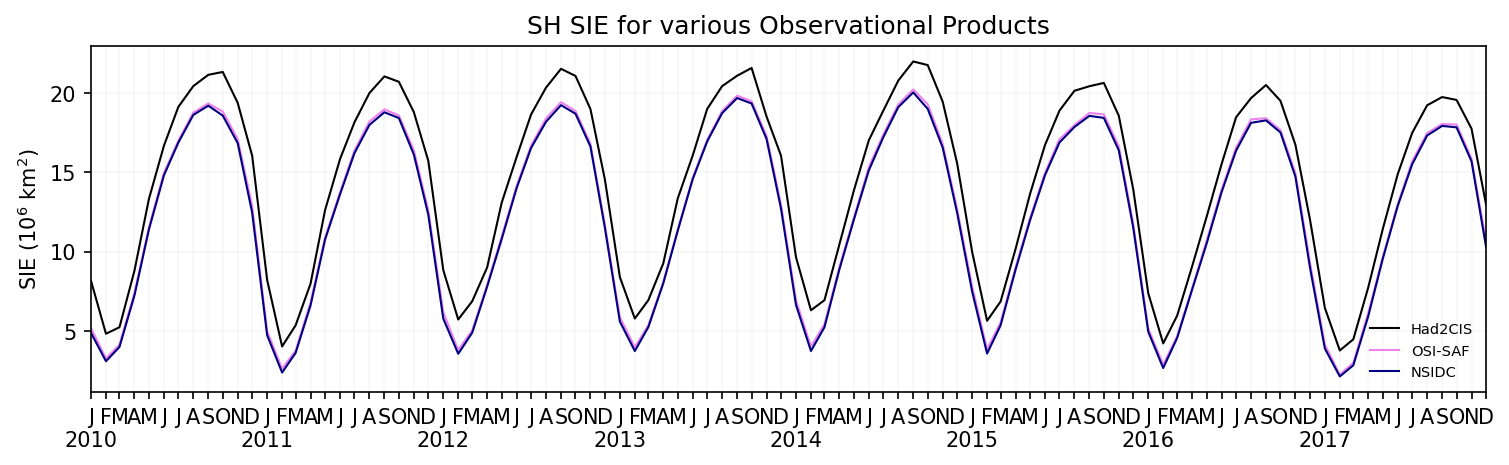

In [38]:
fix,ax=plt.subplots(1,1,figsize=(12,3),dpi=150)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2010,2017]
timeseries = [sie_Had2CIS, sie_OSISAF, sie_NSIDC]
colors = ['black', 'violet', 'navy']
linestyles = ['-','-','-']
labels = ['Had2CIS','OSI-SAF','NSIDC']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=1)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH SIE for various Observational Products")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=7,frameon=False)
#ax.axhline(16.5)
plt.show()

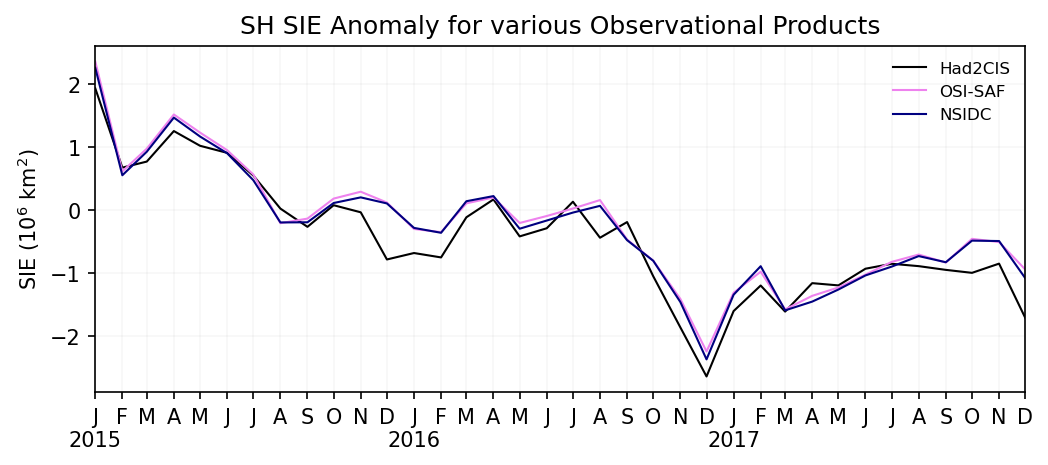

In [39]:
fix,ax=plt.subplots(1,1,figsize=(8,3),dpi=150)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
timeseries = [sie_anom_Had2CIS, sie_anom_OSISAF, sie_anom_NSIDC]
colors = ['black', 'violet', 'navy']
linestyles = ['-','-','-']
labels = ['Had2CIS','OSI-SAF','NSIDC']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=1)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH SIE Anomaly for various Observational Products")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=8,frameon=False)
#ax.axhline(16.5)
plt.show()

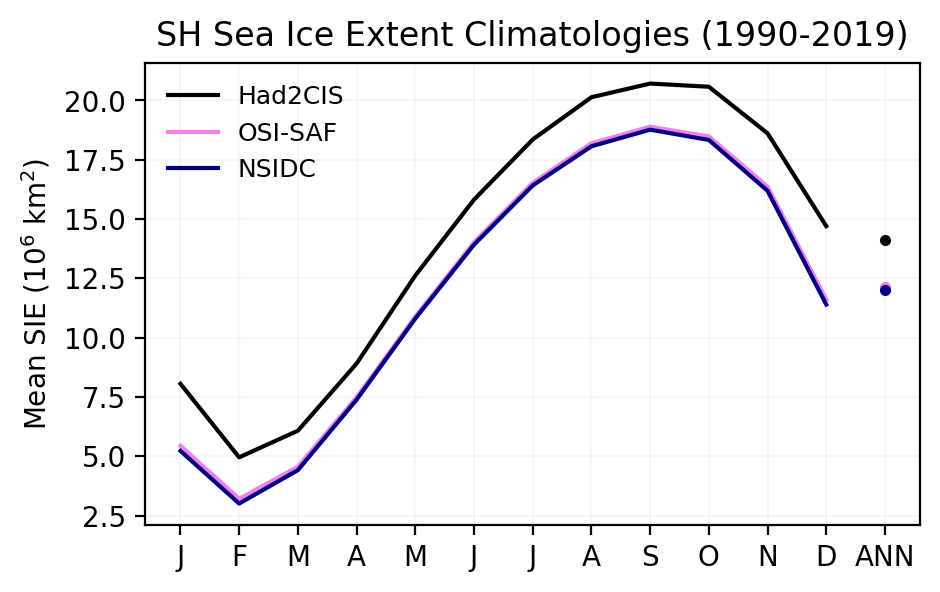

In [40]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sie_clim_Had2CIS, sie_clim_OSISAF, sie_clim_NSIDC]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'violet', 'navy']
linestyles = ['-','-','-']
labels = ['Had2CIS','OSI-SAF','NSIDC']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIE'].values,color=colors[i],label=labels[i])
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"SH Sea Ice Extent Climatologies ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=9,frameon=False)
plt.show()

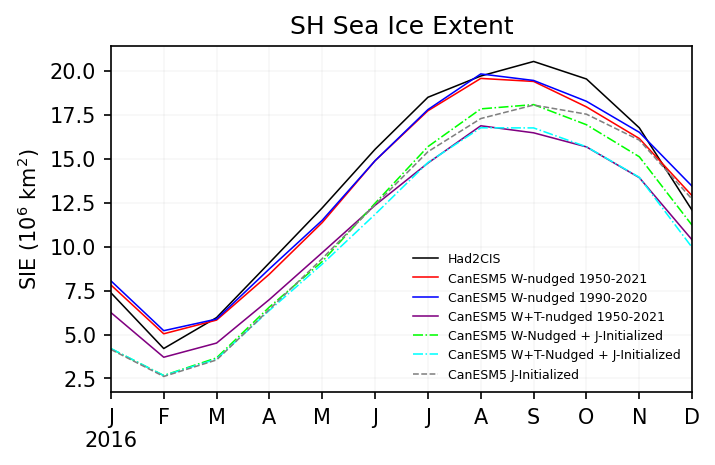

In [41]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=150)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2016,2016]
timeseries = [sie_Had2CIS, sie_CanESM5_wn1950, sie_CanESM5_wn1990, sie_CanESM5_wtn1950, sie_CanESM5_wn2016_init, sie_CanESM5_wtn2016_init, sie_CanESM5_init[0]['SIE']]
colors = ['black', 'red', 'blue', 'purple','lime','cyan','grey']
linestyles = ['-','-','-','-','-.','-.','--']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021','CanESM5 W-Nudged + J-Initialized','CanESM5 W+T-Nudged + J-Initialized','CanESM5 J-Initialized']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=0.75,legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH Sea Ice Extent")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
#ax.axhline(16.5)
plt.show()

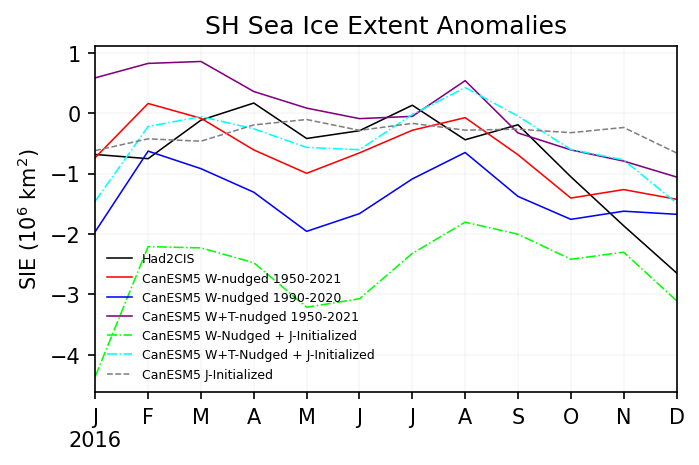

In [42]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=150)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2016,2016]
timeseries = [sie_anom_Had2CIS, sie_anom_CanESM5_wn1950, sie_anom_CanESM5_wn1990, sie_anom_CanESM5_wtn1950, sie_anom_CanESM5_wn2016_init, sie_anom_CanESM5_wtn2016_init, sie_anom_CanESM5_init[0]['SIE']]
colors = ['black', 'red', 'blue', 'purple','lime','cyan','grey']
linestyles = ['-','-','-','-','-.','-.','--']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021','CanESM5 W-Nudged + J-Initialized','CanESM5 W+T-Nudged + J-Initialized','CanESM5 J-Initialized']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],linestyle=linestyles[i],linewidth=0.75,legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH Sea Ice Extent Anomalies")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
plt.show()

### Monthly Anomalies

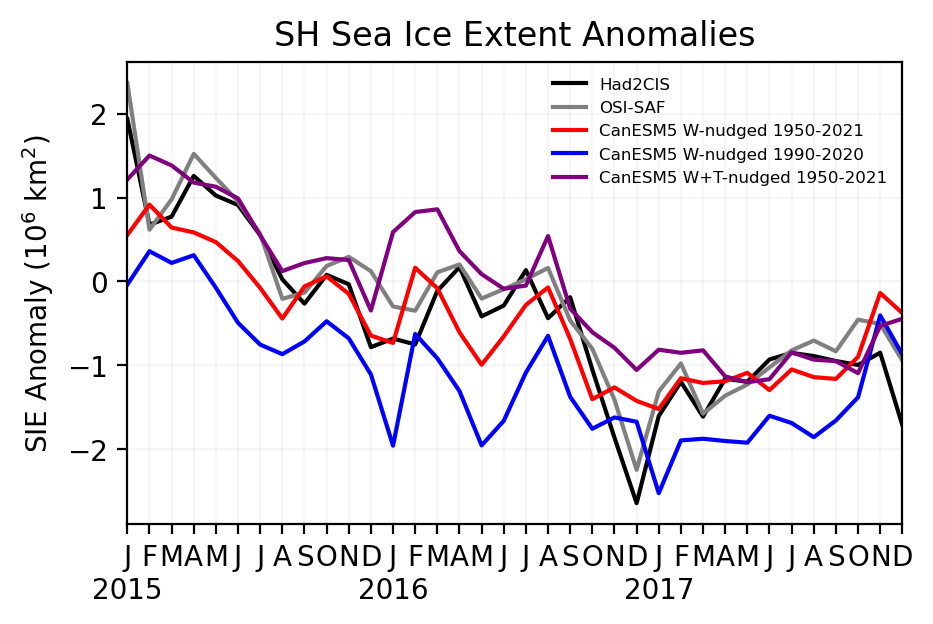

In [43]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
timeseries = [sie_anom_Had2CIS, sie_anom_OSISAF, sie_anom_CanESM5_wn1950, sie_anom_CanESM5_wn1990, sie_anom_CanESM5_wtn1950]
colors = ['black', 'grey', 'red', 'blue', 'purple']
labels = ['Had2CIS','OSI-SAF','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE Anomaly ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH Sea Ice Extent Anomalies")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
plt.show()

### Yearly Mean

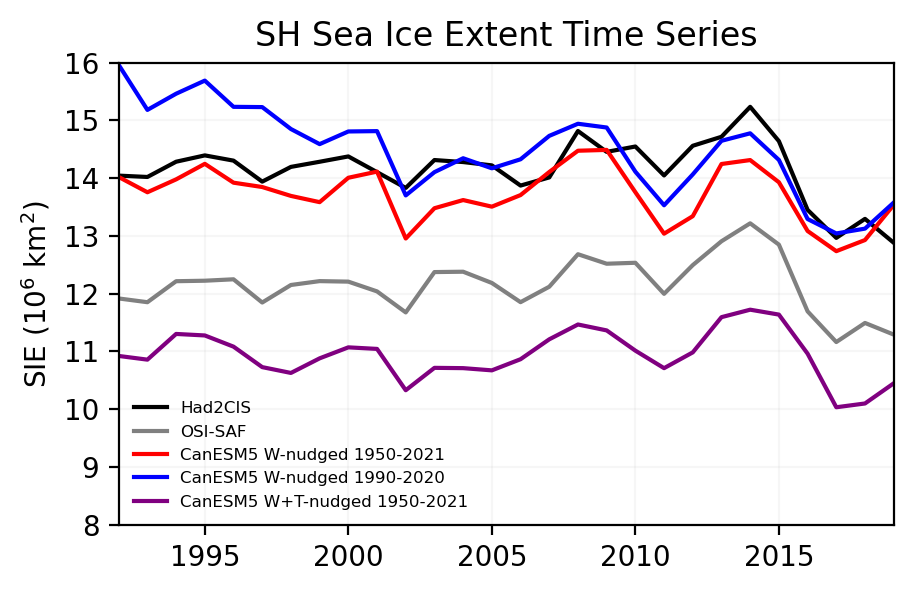

In [44]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [1992,2019]
timeseries = [sie_Had2CIS['SIE'].groupby('time.year').mean(), sie_OSISAF['SIE'].groupby('time.year').mean(), sie_CanESM5_wn1950['SIE'].groupby('time.year').mean(), sie_CanESM5_wn1990['SIE'].groupby('time.year').mean(), sie_CanESM5_wtn1950['SIE'].groupby('time.year').mean()]
colors = ['black', 'grey', 'red', 'blue', 'purple']
labels = ['Had2CIS','OSI-SAF','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021']

# Plot the data
for i,data in enumerate(timeseries):
    data.where((data['year']>=y0) & (data['year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,color=colors[i],legend=True)

# Other details of the plots
ax.set_xlim(y0,y1)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH Sea Ice Extent Time Series")
ax.set_ylim(8,16)
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
plt.show()

### Climatology

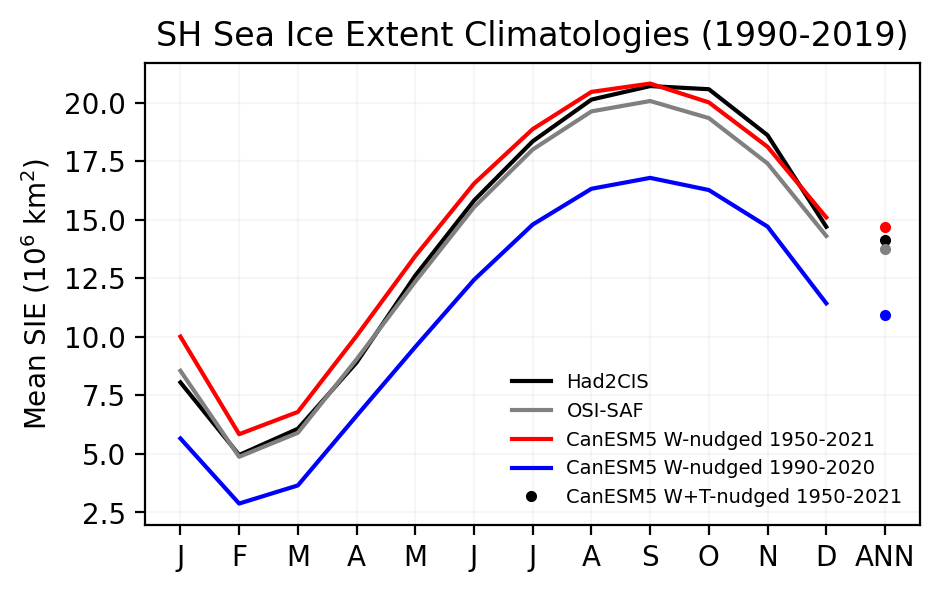

In [45]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sie_clim_Had2CIS, sie_clim_CanESM5_wn1950, sie_clim_CanESM5_wn1990, sie_clim_CanESM5_wtn1950]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIE'].values,color=colors[i],label=labels[i])
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"SH Sea Ice Extent Climatologies ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=7,frameon=False)
plt.show()

### Initialized CanESM5

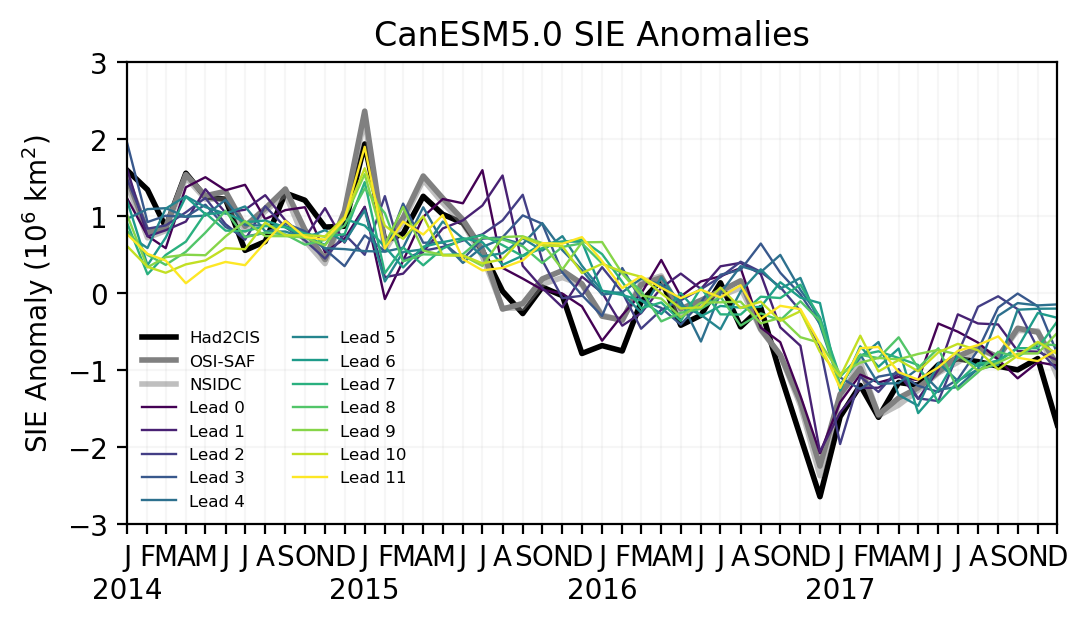

In [46]:
fix,ax=plt.subplots(1,1,figsize=(6,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2014,2017]
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','OSI-SAF','NSIDC','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
sie_anom_Had2CIS.where((sie_anom_Had2CIS['time.year']>=y0) & (sie_anom_Had2CIS['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax,linewidth=2,color='black')
sie_anom_OSISAF.where((sie_anom_OSISAF['time.year']>=y0) & (sie_anom_OSISAF['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax,linewidth=2,color='grey')
sie_anom_NSIDC.where((sie_anom_NSIDC['time.year']>=y0) & (sie_anom_NSIDC['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax,linewidth=2,color='grey',alpha=.5)
for i,data in enumerate(sie_anom_CanESM5_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True)['SIE'].plot.line(ax=ax,linewidth=.85,color=colors[i])

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE Anomaly ($10^6\ \mathrm{km}^2$)")
ax.set_ylim(-3,3)
ax.set_title("CanESM5.0 SIE Anomalies")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=6,frameon=False)
plt.show()

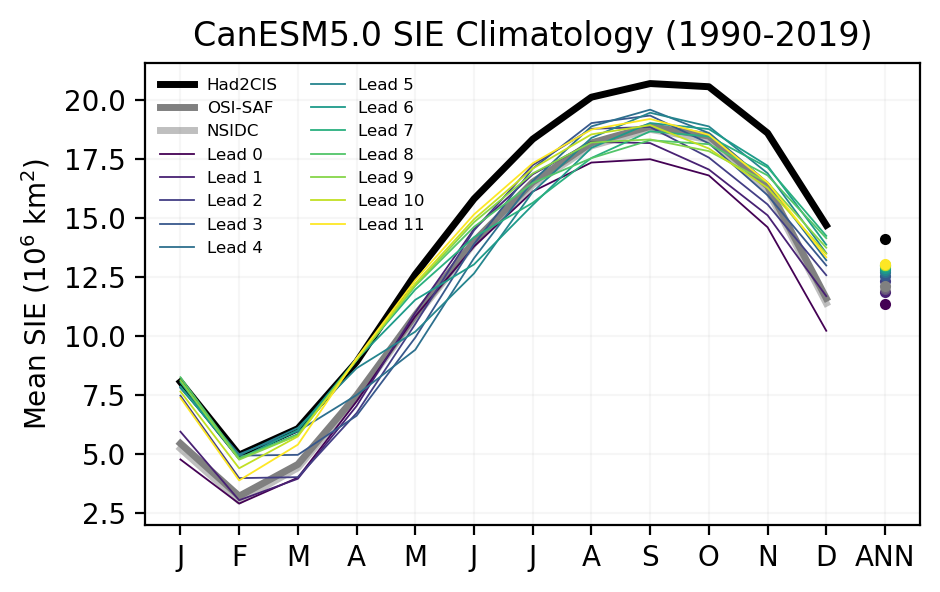

In [47]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','OSI-SAF','NSIDC','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
ax.plot(sie_clim_Had2CIS['SIE'].values,color='black',label="Had2CIS",linewidth=2.5)
ax.plot(sie_clim_OSISAF['SIE'].values,color='grey',label="OSI-SAF",linewidth=2.5)
ax.plot(sie_clim_NSIDC['SIE'].values,color='grey',alpha=.5,label="OSI-SAF",linewidth=2.5)
for i,data in enumerate(sie_clim_CanESM5_init):
    ax.plot(data['SIE'].values,'-',color=colors[i],label=labels[i+1],linewidth=.65)
for i,data in enumerate(sie_clim_CanESM5_init):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])
ax.plot(12,sie_clim_OSISAF['overall_mean'].values,'.',color='grey')
ax.plot(12,sie_clim_Had2CIS['overall_mean'].values,'.',color='black')
ax.plot(12,sie_clim_NSIDC['overall_mean'].values,'.',color='grey',alpha=.5)

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"CanESM5.0 SIE Climatology ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=6,frameon=False)
plt.show()

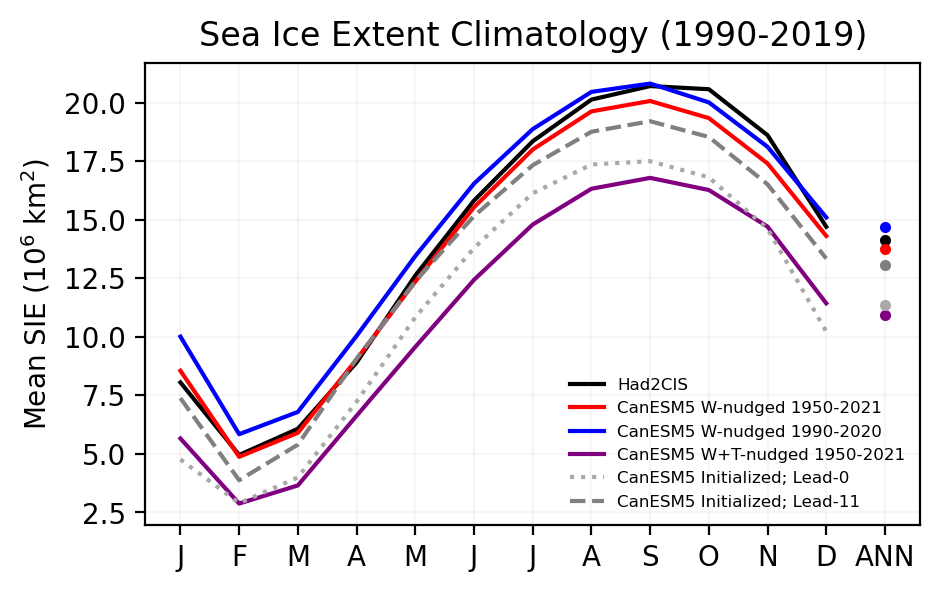

In [48]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sie_clim_Had2CIS, sie_clim_CanESM5_wn1950, sie_clim_CanESM5_wn1990, sie_clim_CanESM5_wtn1950, sie_clim_CanESM5_init[0], sie_clim_CanESM5_init[-1]]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'red', 'blue', 'purple','darkgrey','grey']
linestyles = ['-','-','-','-',':','--']
labels = ['Had2CIS','CanESM5 W-nudged 1950-2021','CanESM5 W-nudged 1990-2020','CanESM5 W+T-nudged 1950-2021','CanESM5 Initialized; Lead-0','CanESM5 Initialized; Lead-11']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIE'].values,color=colors[i],label=labels[i],linestyle=linestyles[i])
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"Sea Ice Extent Climatology ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=6,frameon=False)
plt.show()